In [546]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as sk_kernal


In [547]:
#First dataset

X_1, y_1 = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X_1 = np.dot(X_1, transformation)

In [548]:
#Second dataset
X_2, y_2 = make_moons(n_samples=200, noise=0.05, random_state=0)

In [663]:
# Third dataset 

r1 = 5
r2 = 11

radians = np.random.uniform(low=0, high = 2*math.pi, size = (100,))
radians = radians.reshape(radians.shape[0],1)

x1_c1 = r1*np.sin(radians)
x2_c1 = r1*np.cos(radians)
x_c1 = np.concatenate((x1_c1,x2_c1),axis = 1)
y_c1 = np.zeros(100)

x1_c2 = r2*np.sin(radians)
x2_c2 = r2*np.cos(radians)
x_c2 = np.concatenate((x1_c2,x2_c2),axis = 1)
y_c2 = np.ones(100)

X_3 = np.concatenate((x_c1,x_c2),axis = 0)
Y_3 = np.concatenate((y_c1,y_c2),axis = 0)

In [550]:
def assign_clusters_linear(X,cluster_names,alpha):
    gram_matrix = sk_kernal.linear_kernel(X, X)
    distance_matrix = np.zeros((X.shape[0],len(cluster_names)))
    gram_diag = gram_matrix.diagonal()
    for j in range(len(cluster_names)):
        alpha_j = alpha.T[j]
        gram_alpha = alpha_j *gram_matrix
        gram_alpha2 = (alpha_j* alpha_j)*gram_matrix
        
        for i in range(X.shape[0]):
            distance_matrix[i][j] = gram_diag[i] + np.sum(gram_alpha2) + np.sum(gram_alpha[i])

    #print("Distance matrix: {}".format(distance_matrix))
    labels = np.argsort(distance_matrix,axis=1).T[0]
    #print(labels)
    return labels
    


In [661]:
def assign_clusters_rbf(X,cluster_names,alpha):
    gram_matrix = sk_kernal.rbf_kernel(X, X,gamma=0.4)
    distance_matrix = np.zeros((X.shape[0],len(cluster_names)))
    gram_diag = gram_matrix.diagonal() 
    for j in range(len(cluster_names)):
        alpha_j = alpha.T[j]
        gram_alpha = alpha_j *gram_matrix
        gram_alpha2 = (alpha_j* alpha_j)*gram_matrix
        
        for i in range(X.shape[0]):
            distance_matrix[i][j] = gram_diag[i] + np.sum(gram_alpha2) + np.sum(gram_alpha[i])
#     print("Distance matrix: {}".format(distance_matrix))
    labels = np.argsort(distance_matrix,axis=1).T[0]
#     print(labels)
    return labels

In [734]:
def assign_clusters_quadratic(X,cluster_names,alpha):
    gram_matrix = sk_kernal.polynomial_kernel(X, X,degree=3,gamma=0,coef0=0)
    distance_matrix = np.zeros((X.shape[0],len(cluster_names)))
    gram_diag = gram_matrix.diagonal() 
    for j in range(len(cluster_names)):
        alpha_j = alpha.T[j]
        gram_alpha = alpha_j *gram_matrix
        gram_alpha2 = (alpha_j* alpha_j)*gram_matrix
        
        for i in range(X.shape[0]):
            distance_matrix[i][j] = gram_diag[i] + np.sum(gram_alpha2) + np.sum(gram_alpha[i])
#     print("Distance matrix: {}".format(distance_matrix))
    labels = np.argsort(distance_matrix,axis=1).T[0]
#     print(labels)
    return labels

In [667]:
def initialize_Z(k,n):
    Z= []
    #np.random.seed(seed= 1200)
    for i in range(n):
        j = np.random.randint(0,k)
        n_j = np.zeros(k)
        n_j[j] = 1
        Z.append(n_j)
    Z = np.array(Z)
    return Z
    

In [648]:
def get_alpha(Z):
    alpha = np.array(Z,copy = True)
    cluster_sizes = np.sum(alpha, axis = 0)
    alpha = np.divide(alpha,cluster_sizes)
    return alpha

In [649]:
def update_z(labels,k,n):
    Z = np.zeros((n,k))
    for i in range(n):
        Z[i][labels[i]] = 1
    #print("updated Z:", Z)
    return Z

In [650]:
# Divya's algorithm on Kmeans
def get_kernalized_kmeans_cluster(X,y,kernel):

    #number of clusters
    k = np.unique(y).shape[0]  
    #print("k is {}".format(k))
    n = X.shape[0]
    d = X.shape[1]
    Z = initialize_Z(k,n)
    #print("Z: {}".format(Z))
    alpha = get_alpha(Z)
    
    cluster_names = [i for i in range(k)]
    counter = 0  
   
    #While the diffenerence in cluster centers is less than 0.001 update centers
    while(counter < 50):
        counter +=1
        #print("=====counter is {} ======".format(counter))
        if kernel == 'linear':
            labels = np.array(assign_clusters_linear(X,cluster_names,alpha))
        if kernel == 'quadratic':
            labels = np.array(assign_clusters_quadratic(X,cluster_names,alpha))
        if kernel == 'rbf':
            labels = np.array(assign_clusters_rbf(X,cluster_names,alpha))        
        
        Z_new = update_z(labels,k,n)
        alpha_new = get_alpha(Z_new)
        alpha = np.array(alpha_new,copy=True)
        
        #once the desired delta is achieved, plot the clusters with labels
        if counter == 50:
            fig, ax = plt.subplots(1,2,figsize = (20,10))
            ax[0].set_title("original labels")
            ax[0].set_title
            ax[0].scatter(X.T[0],X.T[1],c=y)
            
            ax[1].set_title("K means labels")
            ax[1].scatter(X.T[0],X.T[1],c=labels)
            
            plt.suptitle("Orginal Clusters Vs Kmeans Clusters",fontsize = 24, fontweight = 'bold')
            plt.show()
                       

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


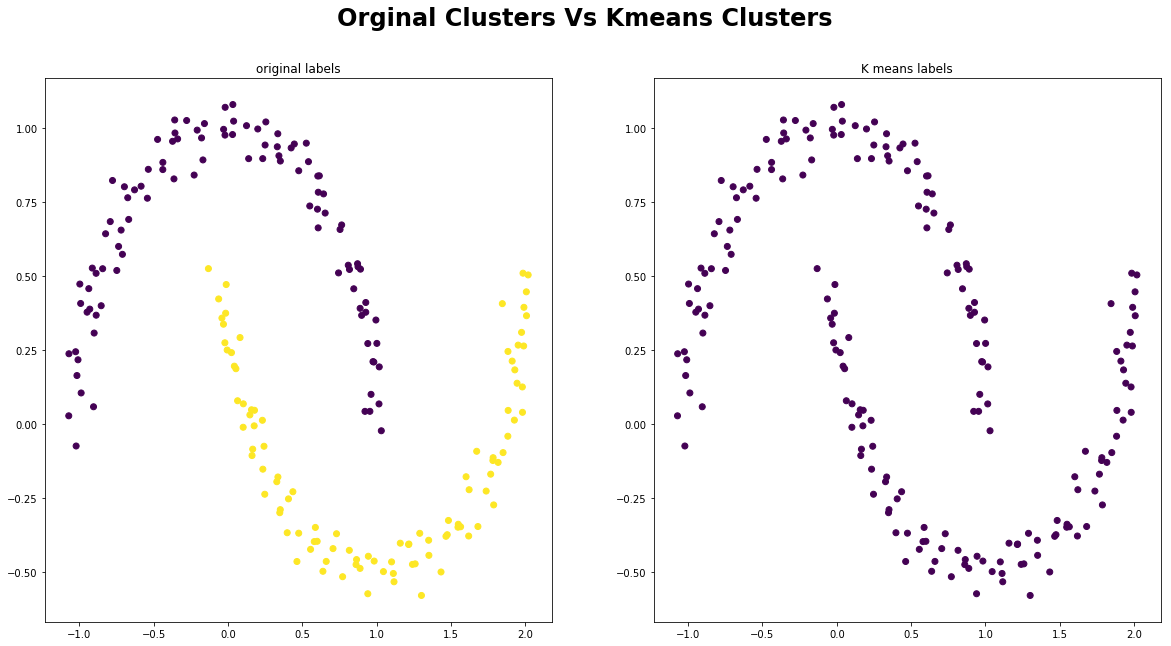

In [655]:
get_kernalized_kmeans_cluster(X_2,y_2,"rbf")

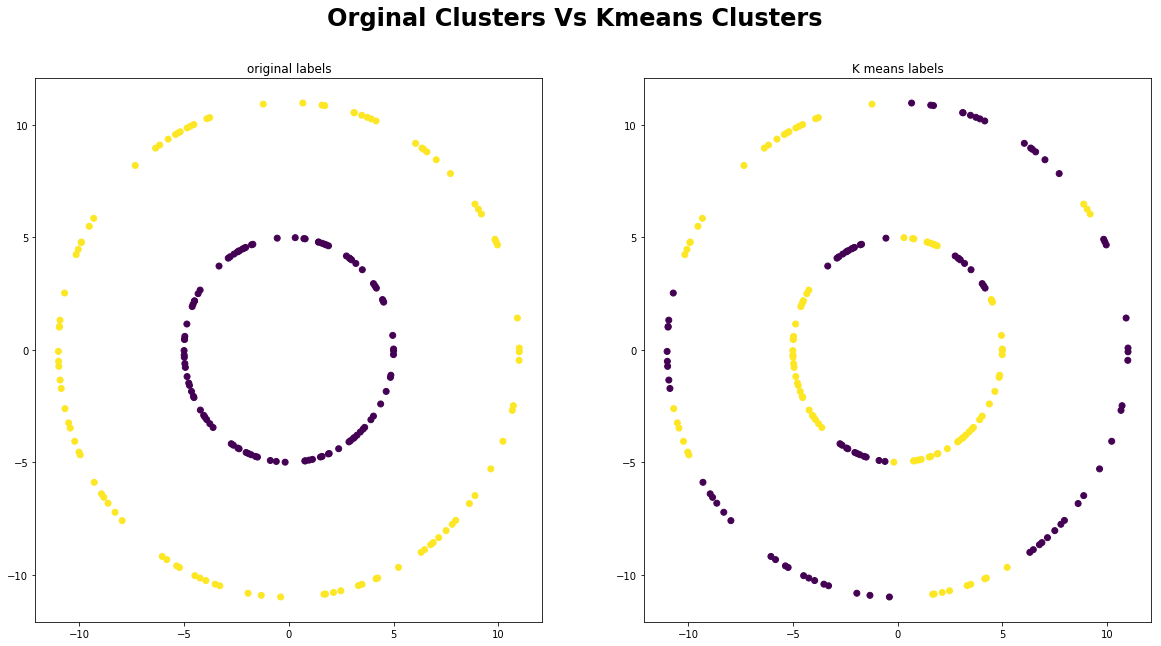

In [664]:
get_kernalized_kmeans_cluster(X_3,Y_3,"rbf")

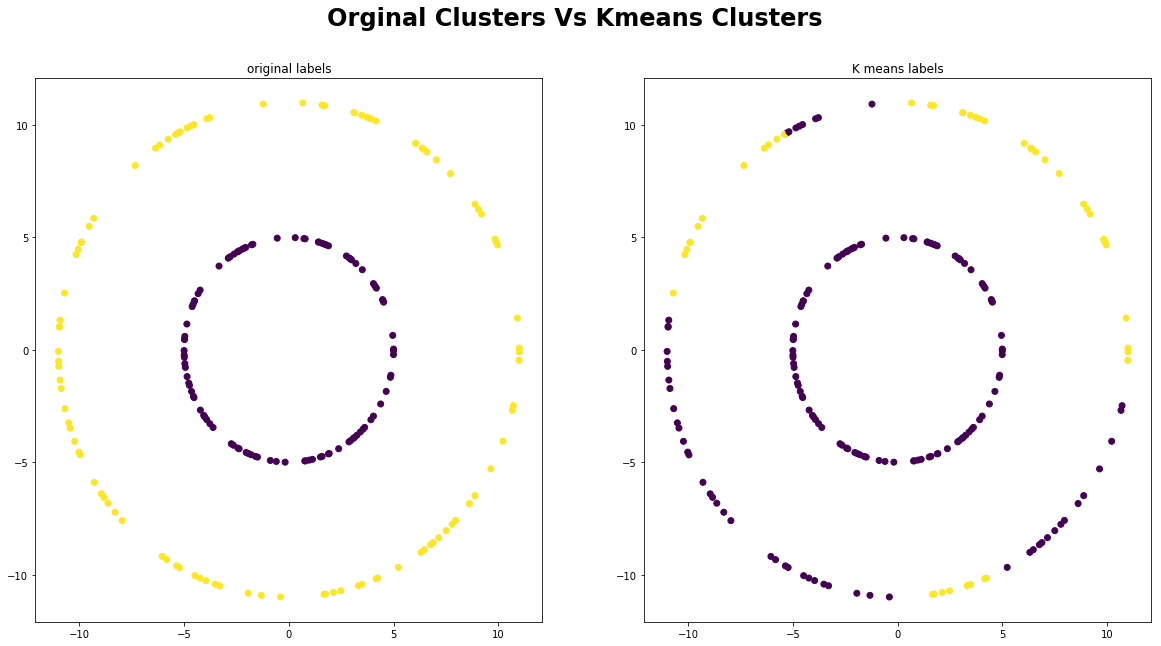

In [687]:
get_kernalized_kmeans_cluster(X_3,Y_3,"quadratic")

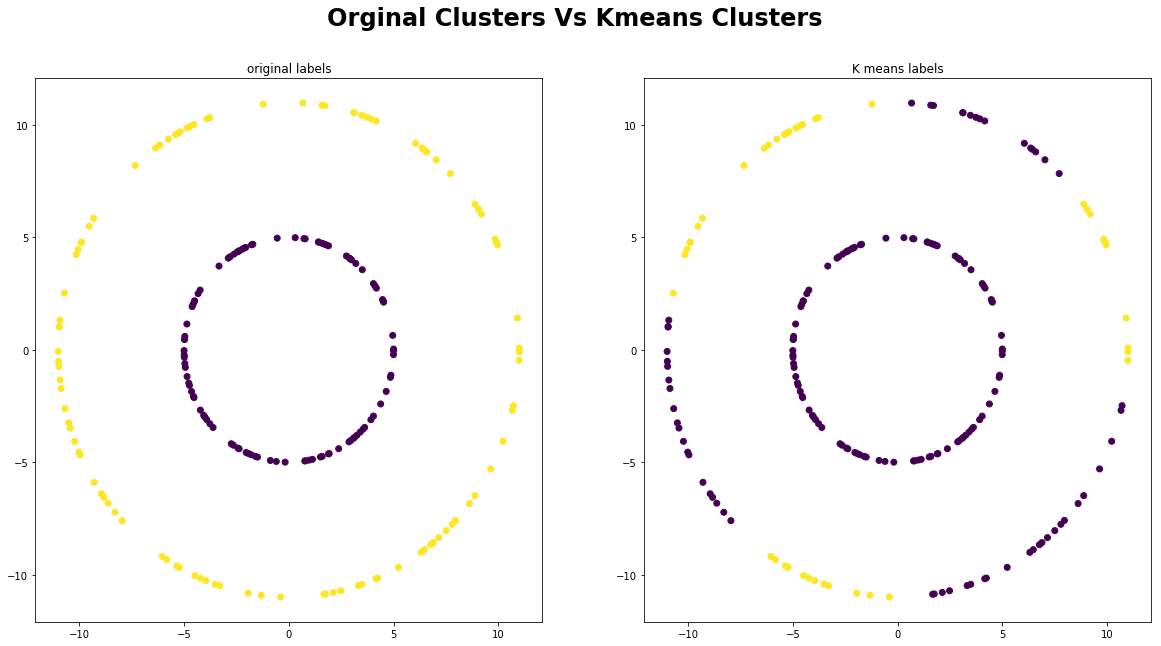

In [724]:
get_kernalized_kmeans_cluster(X_3,Y_3,"quadratic")

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


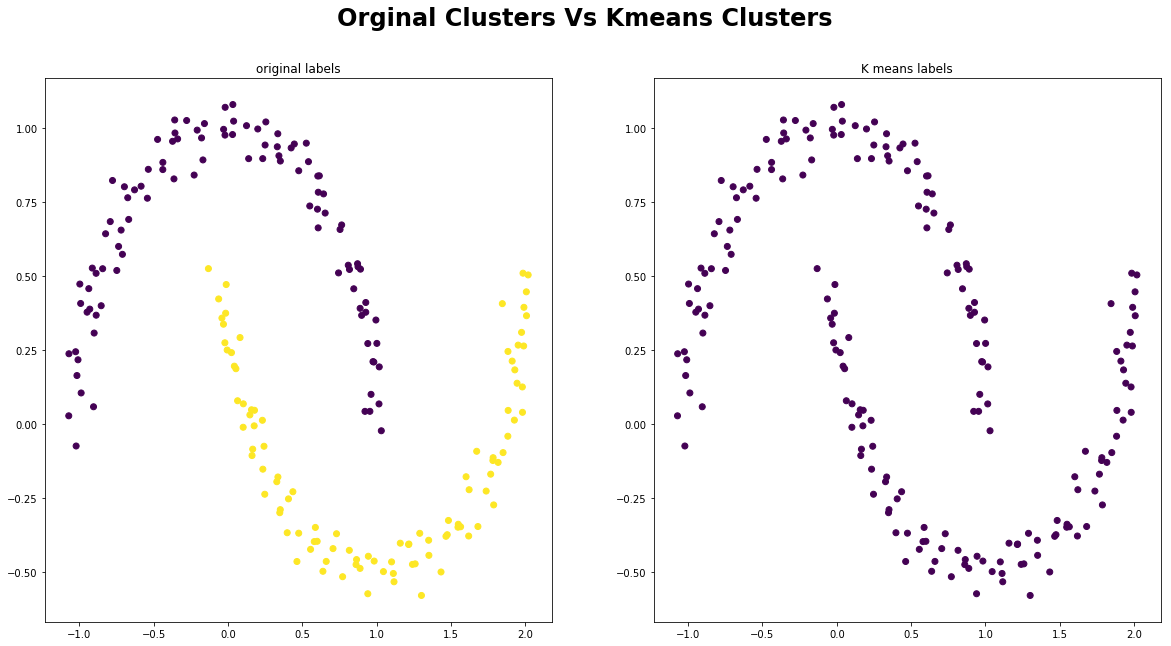

In [745]:
get_kernalized_kmeans_cluster(X_2,y_2,"quadratic")